# About Dataset
This dataset contains information about luxury watch models from various brands, including their prices, case and strap materials, movement types, water resistance levels, and additional details such as case diameter, case thickness, band width, dial color, crystal material, complications, and power reserve. The data is useful for individuals interested in luxury watches, including watch collectors, enthusiasts, and retailers.

**Column Details**
* • Brand: The brand of the watch.
* • Model: The model name or number of the watch.
* • Case Material: The material used to make the watch case (e.g., stainless steel, titanium, gold).
* • Strap Material: The material used to make the watch strap or bracelet (e.g., leather, rubber, metal).
* • Movement Type: The type of movement used in the watch (e.g., automatic, manual, quartz).
* • Water Resistance: The level of water resistance for the watch (e.g., 30 meters, 100 meters, 600 meters).
* • Case Diameter (mm): The diameter of the watch case in millimeters.
* • Case Thickness (mm): The thickness of the watch case in millimeters.
* • Band Width (mm): The width of the watch strap or bracelet in millimeters.
* • Dial Color: The color of the watch dial (e.g., black, blue, silver).
* • Crystal Material: The material used for the watch crystal (e.g., sapphire, mineral, hardlex).
* • Complications: Any additional functions or features beyond timekeeping (e.g., date display, chronograph, GMT).
* • Power Reserve: The amount of time the watch can run without winding or wearing (e.g., 48 hours, 72 hours).
* • Price (USD): The retail price of the watch in US dollars.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('Luxury watch.csv')
df.head()

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.0,13.00,20.0,Black,Sapphire,Date,48 hours,"9,500"
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.5,14.47,21.0,Blue,Sapphire,Date,60 hours,"5,800"
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100 meters,41.0,13.00,20.0,White,Sapphire,Chronograph,42 hours,"4,200"
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30 meters,43.0,14.25,22.0,Black,Sapphire,Chronograph,70 hours,"7,900"
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30 meters,31.0,6.05,20.0,Silver,Sapphire,NaN,NaN,"2,800"


In [3]:
df.shape

(507, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                507 non-null    object 
 1   Model                507 non-null    object 
 2   Case Material        507 non-null    object 
 3   Strap Material       507 non-null    object 
 4   Movement Type        507 non-null    object 
 5   Water Resistance     507 non-null    object 
 6   Case Diameter (mm)   507 non-null    float64
 7   Case Thickness (mm)  507 non-null    float64
 8   Band Width (mm)      507 non-null    float64
 9   Dial Color           507 non-null    object 
 10  Crystal Material     507 non-null    object 
 11  Complications        385 non-null    object 
 12  Power Reserve        493 non-null    object 
 13  Price (USD)          506 non-null    object 
dtypes: float64(3), object(11)
memory usage: 55.6+ KB


# Price Distribution

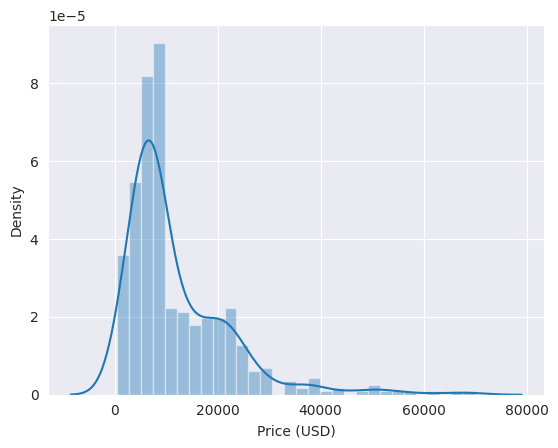

In [5]:
df['Price (USD)'] = df['Price (USD)'].apply(lambda x:float(str(x).replace(',','')))
sns.distplot(df['Price (USD)'],bins=30)
plt.show()

From the graph above, we see that most of the luxury watch cost around 5000-10000 dollars. There is very little watch cost around 80000 dollar. Now let's look at the categorical variable. 

# Categorical Variables

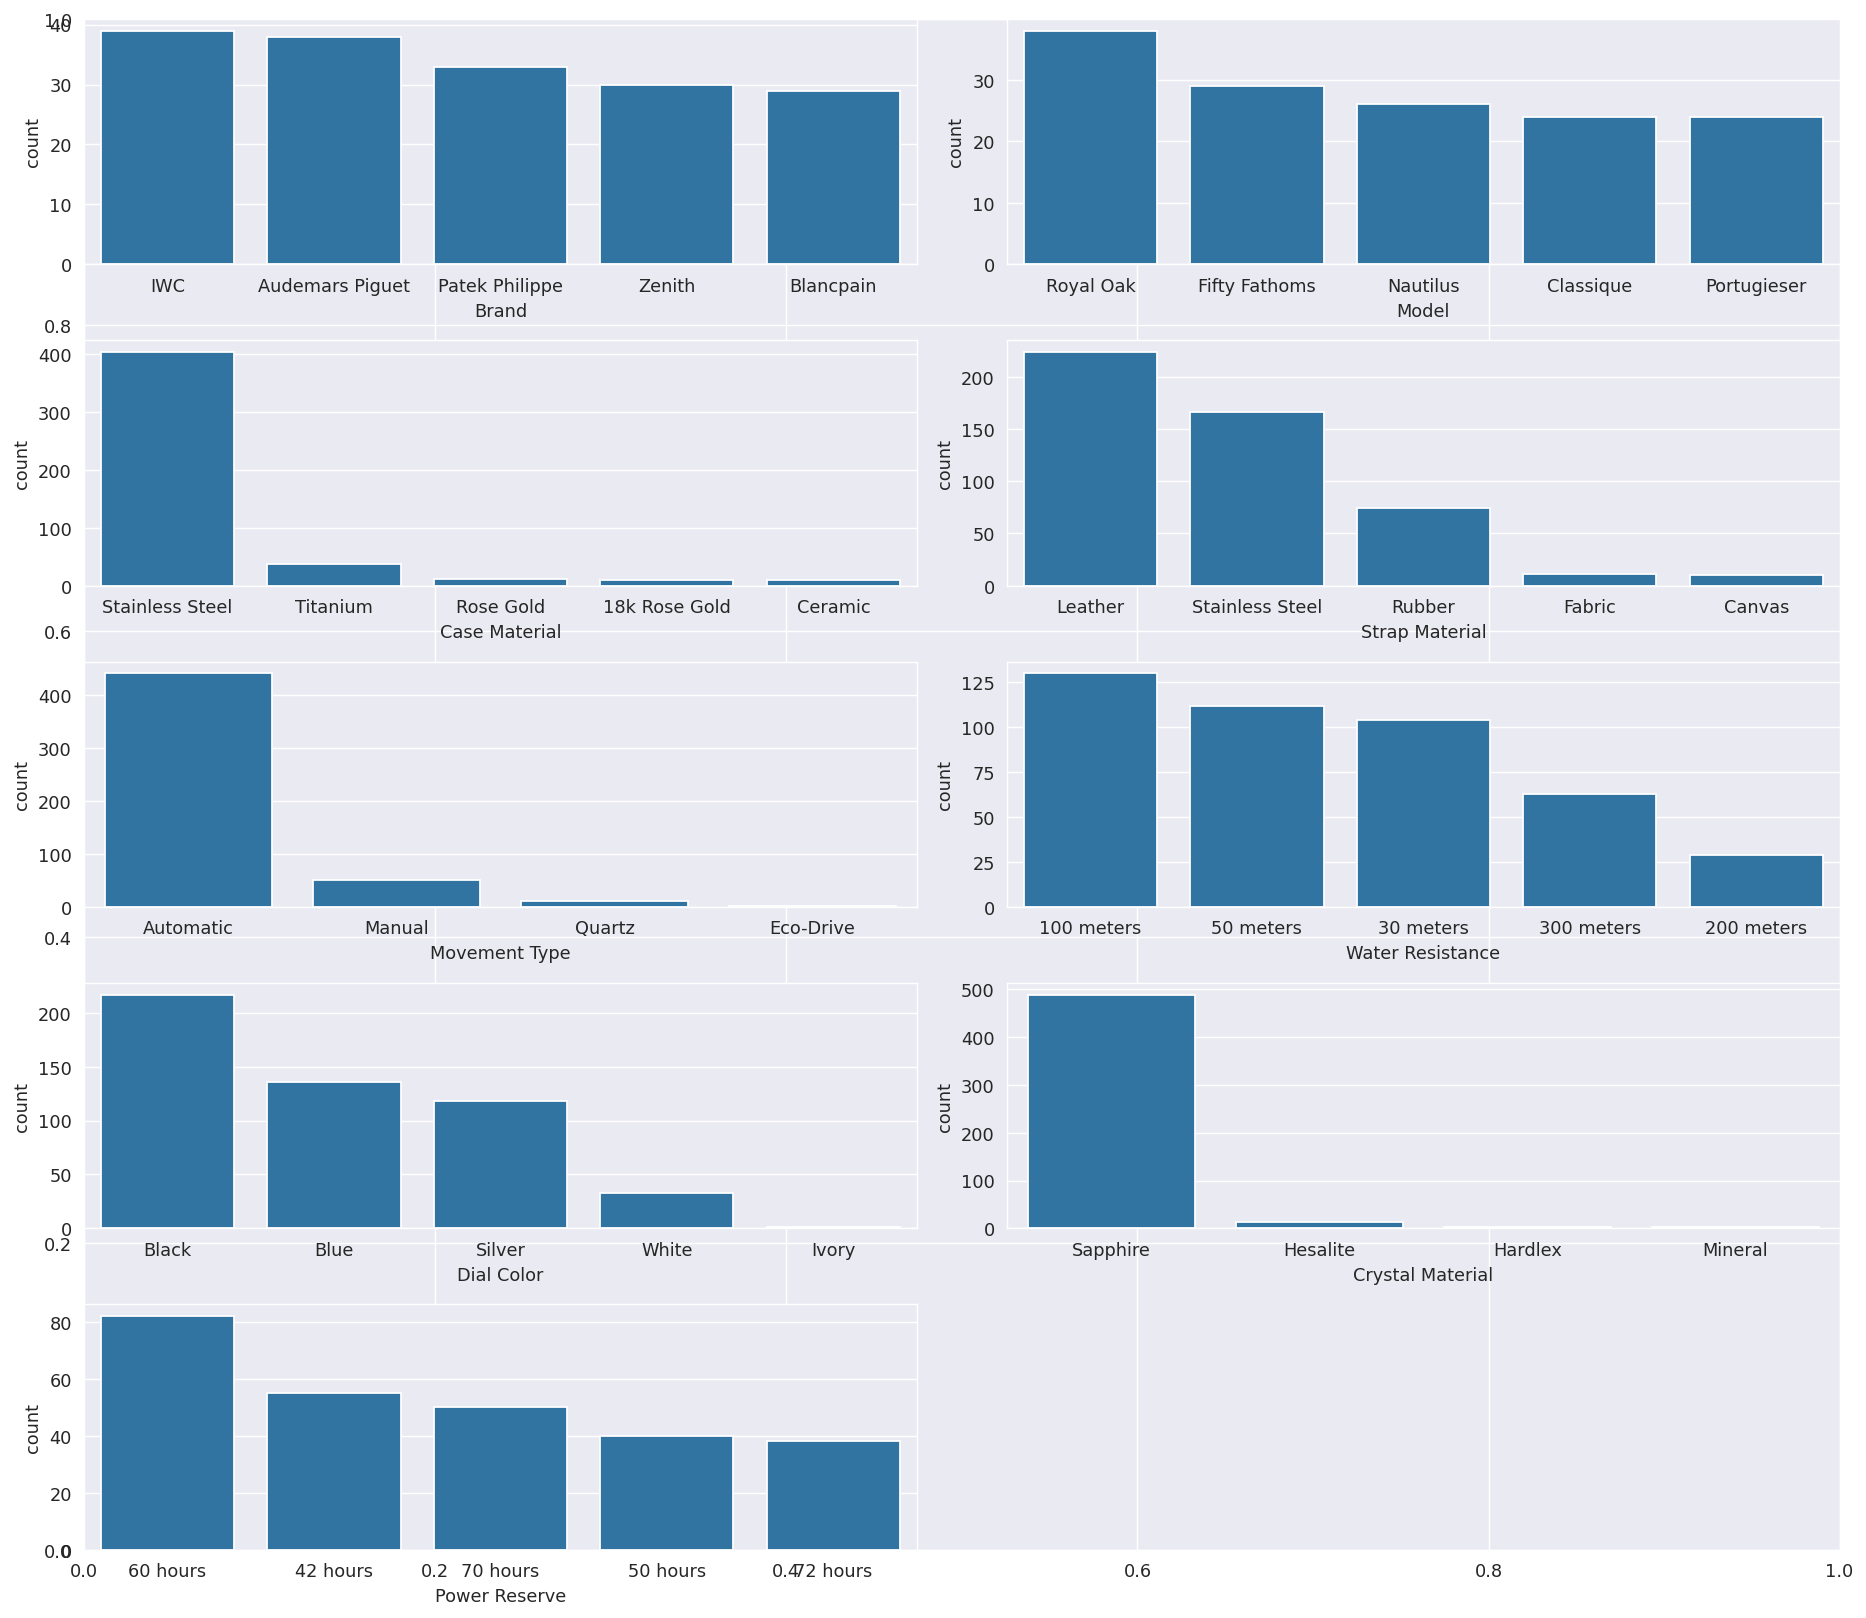

In [6]:
col = ['Brand','Model','Case Material','Strap Material','Movement Type','Water Resistance','Dial Color','Crystal Material','Power Reserve']
fig,ax = plt.subplots(dpi=128, figsize=(15,13))
for num,i in enumerate(col,1):
    plt.subplot(5,2,num)
    sns.countplot(x=df[i],data=df,order=df[i].value_counts().head().index)
plt.tight_layout()
plt.show()

# Numerical Variables

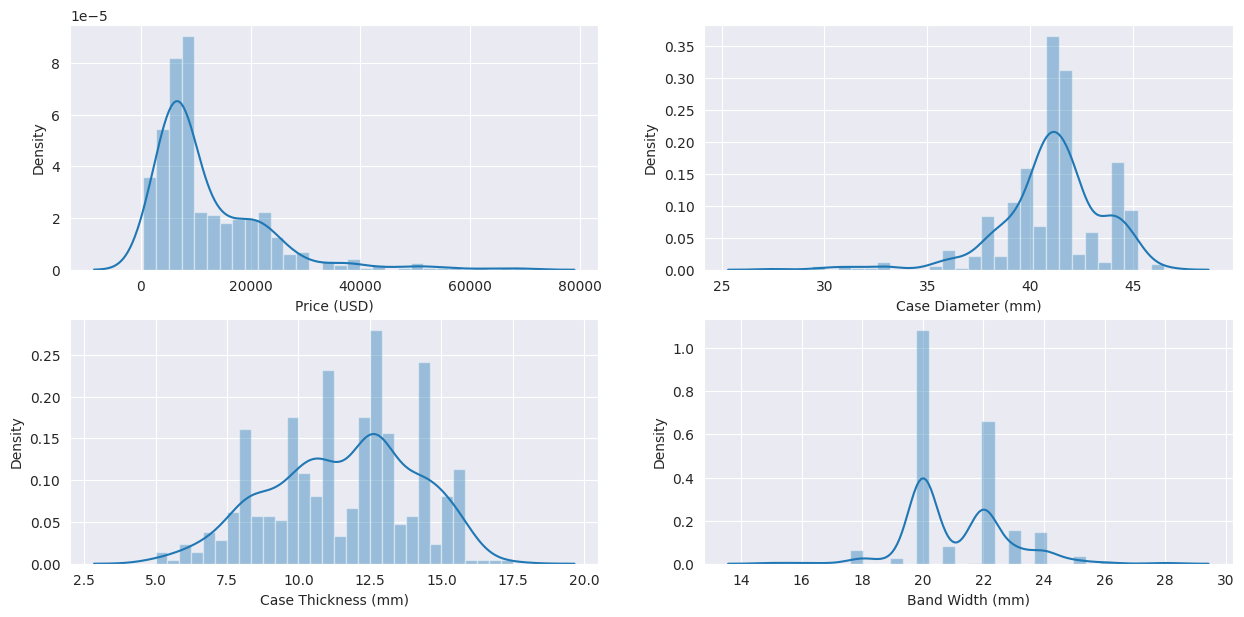

In [7]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.distplot(df['Price (USD)'],bins=30)
plt.subplot(2,2,2)
sns.distplot(df['Case Diameter (mm)'],bins=30)
plt.subplot(2,2,3)
sns.distplot(df['Case Thickness (mm)'],bins=30)
plt.subplot(2,2,4)
sns.distplot(df['Band Width (mm)'],bins=30)
plt.show()

# Complications column
we see that one watch may have several different additionnal fonctions or features, so we will counter for these features and see which feature that we add the most on a watch.

In [8]:
lst1 = []
for i in df['Complications'].dropna():
    lst1.append(i.split(','))
#lst1

In [9]:
lst2 = []
for i in lst1:
    for j in i:
        lst2.append(j.lstrip())
#lst2

In [10]:
from collections import Counter
Counter(lst2)

Counter({'Date': 291,
         'Chronograph': 108,
         'GMT': 14,
         'Tachymeter': 8,
         'Power Reserve': 6,
         'Moon Phase': 5,
         'Power Reserve Indicator': 4,
         'Moonphase': 4,
         'World Time': 3,
         'Second Time Zone': 2,
         'Stopwatch': 2,
         'Unidirectional Bezel': 1,
         'Flyback': 1,
         'Day/Date': 1,
         'Rotating Bezel': 1,
         'Cyclops': 1,
         'Cyclops Lens': 1,
         'Sub Seconds': 1,
         'Dual Time Zone': 1})

From lst2 we see that Date is the most common function in watch.